Importing Modules

In [39]:
import numpy as np
import matplotlib.pyplot as plt

Defining Class

In [40]:
class KDNode:
    def __init__(self, point, left=None, right=None, points=None):
        self.point = point
        self.left = left
        self.right = right
        self.points=points

Building KD Tree

In [41]:
def build_kd_tree(points, depth=0, leaf_size=40):
    if len(points) <= leaf_size:
        return KDNode(point=None, points=points)
    
    k = len(points[0])
    axis = depth % k
    sorted_points = sorted(points, key=lambda x: x[axis])
    median_idx = len(sorted_points) // 2
    
    return KDNode(
        point=sorted_points[median_idx],
        left=build_kd_tree(sorted_points[:median_idx], depth + 1),
        right=build_kd_tree(sorted_points[median_idx + 1:], depth + 1)
    )

Plotting KD Tree

In [42]:
def plot_kd_tree(ax, tree, xmin, xmax, ymin, ymax, depth=0):
    if tree is None:
        return
    
    axis = depth % 2
    if tree.left is not None or tree.right is not None:  # Non-leaf node
        if axis == 0:
            ax.plot([tree.point[0], tree.point[0]], [ymin, ymax], color='black')
            plot_kd_tree(ax, tree.left, xmin, tree.point[0], ymin, ymax, depth + 1)
            plot_kd_tree(ax, tree.right, tree.point[0], xmax, ymin, ymax, depth + 1)
        else:
            ax.plot([xmin, xmax], [tree.point[1], tree.point[1]], color='black')
            plot_kd_tree(ax, tree.left, xmin, xmax, ymin, tree.point[1], depth + 1)
            plot_kd_tree(ax, tree.right, xmin, xmax, tree.point[1], ymax, depth + 1)
    else:  # Leaf node
        points = np.array(tree.points)
        ax.scatter(points[:, 0], points[:, 1], color='red')

Function for Euclidean Distance

In [43]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

Finding Leaf Node for Query Point

In [44]:
def find_leaf_node(tree, query_point,depth=0):
    if tree is None:
        return None
        
    if tree.left is None:
        if tree.right is None:  # Leaf node
            return tree
        else:
            return find_leaf_node(tree.right, query_point)
    elif tree.right is None:
        if tree.left is None:
            return tree
        else:
            return find_leaf_node(tree.left, query_point)
    else:
        axis = depth % len(query_point)
    if query_point[axis] < tree.point[axis]:
        return find_leaf_node(tree.left, query_point, depth + 1)
    else:
        return find_leaf_node(tree.right, query_point, depth + 1)


Plotting the Leaf Node Points

In [45]:
def plot_kd_tree_points(ax, tree):
    if tree is None:
        return
    if tree.left is None and tree.right is None:  # Leaf node
        points = np.array(tree.points)
        ax.scatter(points[:, 0], points[:, 1], color='cyan', marker='x')
    else:
        plot_kd_tree_points(ax, tree.left)
        plot_kd_tree_points(ax, tree.right)

Finding KNN in the leaf node

In [46]:
def knn_search_within_leaf(points, query_point, k):
    distances = [euclidean_distance(query_point, p) for p in points]
    sorted_indices = np.argsort(distances)
    return [points[i] for i in sorted_indices[:k]]

Plotting KNN

In [47]:
def plot_nearest_neighbors(ax, nearest_neighbors, query_point):
    for point in nearest_neighbors:
        ax.plot([query_point[0], point[0]], [query_point[1], point[1]], color='blue', linestyle='--')

Calling Functions 

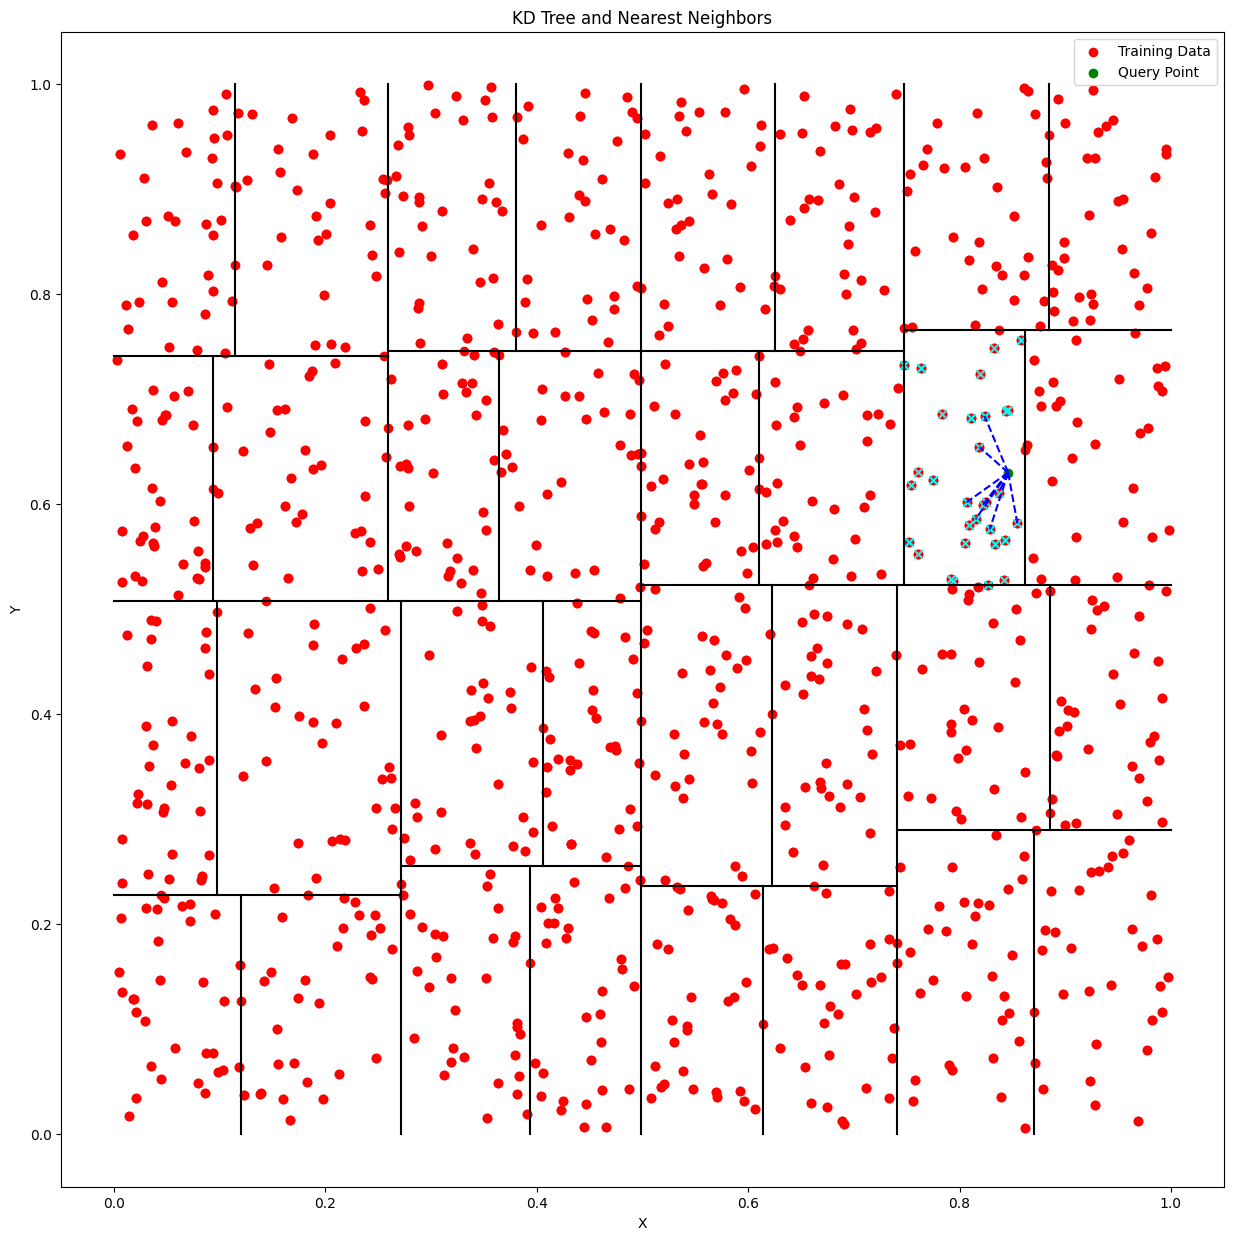

In [51]:
# Generate random data
# np.random.seed(0)
train_data = np.random.rand(1000, 2)
query_point = np.random.rand(2)
k=9

# Build the KD tree
kd_tree = build_kd_tree(train_data)

leaf_node = find_leaf_node(kd_tree, query_point)

k_nearest_neighbors = knn_search_within_leaf(leaf_node.points, query_point, k)

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(train_data[:, 0], train_data[:, 1], color='red', label='Training Data')
ax.scatter(query_point[0], query_point[1], color='green', label='Query Point')
plot_kd_tree(ax, kd_tree, 0, 1, 0, 1)
plot_kd_tree_points(ax, leaf_node)  # Plot leaf node points
plot_nearest_neighbors(ax, k_nearest_neighbors, query_point)
ax.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KD Tree and Nearest Neighbors')
plt.show()